In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
data1 = pd.read_csv('/content/soil_moisture_duration.csv')

In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raw_moisture           1000 non-null   int64  
 1   temperature            1000 non-null   float64
 2   moisture_duration_hrs  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [47]:
data1.head()

,raw_moisture,temperature,moisture_duration_hrs
0,792,17.95,4.54
1,295,37.79,10.27
2,638,24.69,6.15
3,543,17.07,4.64
4,590,26.89,3.82


In [20]:
data1.shape

(1000, 3)

In [22]:
data1.isnull().sum()

,0
raw_moisture,0
temperature,0
moisture_duration_hrs,0


In [24]:
data1['moisture_percent'] = 100 - (data1['raw_moisture'] / 1023) * 100

In [25]:
data1.head()

,raw_moisture,temperature,moisture_duration_hrs,moisture_percent
0,792,17.95,4.54,22.580645
1,295,37.79,10.27,71.163245
2,638,24.69,6.15,37.634409
3,543,17.07,4.64,46.920821
4,590,26.89,3.82,42.326491


Text(0.5, 1.0, 'Distribution of Moisture Duration (hrs)')

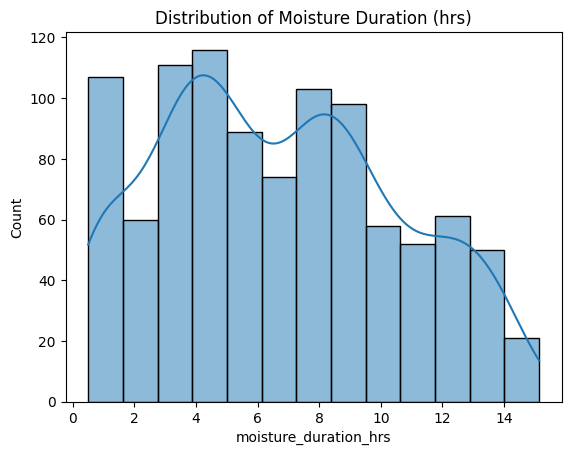

In [27]:
sns.histplot(data1['moisture_duration_hrs'], kde=True)
plt.title("Distribution of Moisture Duration (hrs)")

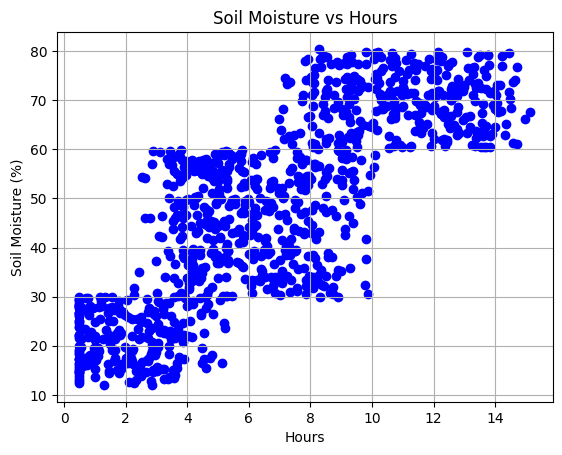

In [31]:
# Scatter plot without connecting the dots
plt.scatter(data1['moisture_duration_hrs'], data1['moisture_percent'], color='b', marker='o')

# Adding labels and title
plt.xlabel('Hours')
plt.ylabel('Soil Moisture (%)')
plt.title('Soil Moisture vs Hours')

# Displaying the plot
plt.grid(True)
plt.show()


In [32]:
y = data1['moisture_duration_hrs']
x = data1.drop(['moisture_duration_hrs'], axis=1)

In [33]:
x

,raw_moisture,temperature,moisture_percent
0,792,17.95,22.580645
1,295,37.79,71.163245
2,638,24.69,37.634409
3,543,17.07,46.920821
4,590,26.89,42.326491
...,...,...,...
995,212,27.47,79.276637
996,725,36.00,29.130010
997,395,20.31,61.388074
998,239,44.00,76.637341


In [34]:
y

,moisture_duration_hrs
0,4.54
1,10.27
2,6.15
3,4.64
4,3.82
...,...
995,13.49
996,1.21
997,8.90
998,13.25


In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [37]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Linear Regression - MAE: 1.5439, MSE: 3.7719, RMSE: 1.9421, R2: 0.7448


In [38]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Decision Tree - MAE: 1.8862, MSE: 5.3548, RMSE: 2.3140, R2: 0.6377


In [39]:

model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Random Forest - MAE: 1.6088, MSE: 3.5943, RMSE: 1.8959, R2: 0.7568


In [40]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Gradient Boosting - MAE: 1.5211, MSE: 3.3119, RMSE: 1.8199, R2: 0.7759


In [41]:
model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"SVR - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


SVR - MAE: 1.5848, MSE: 3.8131, RMSE: 1.9527, R2: 0.7420
